In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('in_vivo_ephys_openephys')

os.chdir('../')

In [123]:
pos_data = pd.read_pickle('position_data.pkl')
fr_data = pd.read_pickle('spatial_firing.pkl')

In [129]:
assert pos_data.index.start==0
data4copula = [[] for i in range(len(fr_data))]
for cluster in range(len(fr_data)):
    when, count = np.unique((fr_data.iloc[cluster].firing_times.astype("int")//pos_data.index.step),return_counts=True)
    spikes = np.zeros(len(pos_data)).astype("int")
    spikes[when] = count
    pos_data["spikes_per200ms"] = spikes
    data4copula[cluster] = [spikes,
                            np.array(pos_data.speed_per200ms),
                            np.array(pos_data.x_position_cm),
#                              [],
                            np.array(pos_data.trial_number),
                            np.array(pos_data.trial_type)]
fr_data["spikes_per200ms"]=data4copula
    

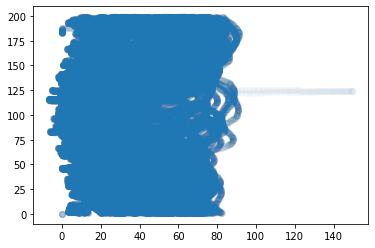

In [130]:
plt.scatter(fr_data.iloc[0].spikes_per200ms[1],fr_data.iloc[0].spikes_per200ms[2],alpha=0.01)

In [131]:
pos_data

,x_position_cm,time_seconds,speed_per200ms,trial_number,trial_type,spikes_per200ms
0,183.00,0.000,0.000000,1,1,0
30,182.75,0.001,0.000000,1,1,0
60,182.75,0.002,0.000000,1,1,0
90,183.00,0.003,0.000000,1,1,0
120,182.75,0.004,0.000000,1,1,0
...,...,...,...,...,...,...
52304760,0.00,1743.492,0.006615,227,0,0
52304790,0.00,1743.493,0.000417,227,0,0
52304820,0.00,1743.494,0.000000,227,0,0
52304850,0.00,1743.495,0.000000,227,0,0


In [132]:
session=fr_data.iloc[0].session_id
fr_data.to_pickle(f"{session}_200ms.pkl",)

In [133]:
session

'M3_D18_2020-11-21_14-29-49'